<a href="https://colab.research.google.com/github/manudsanun/Spatial_intern_2024/blob/main/Immuno_oncology_Gene_Panel__Gene_List_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# Vizgen

## นำเข้าข้อมูลยีนจาก NCBI


In [3]:
# Melanoma[All Fields] AND "Homo sapiens"[porgn] AND ("matches ensembl"[Properties] AND alive[prop] เลือกเฉพาะข้อมูลของ Human
ncbi = pd.read_csv('/content/drive/MyDrive/Spatial/Melanoma_human.txt', delimiter='\t')
ncbi

,tax_id,Org_name,GeneID,CurrentID,Status,Symbol,Aliases,description,other_designations,map_location,chromosome,genomic_nucleotide_accession.version,start_position_on_the_genomic_accession,end_position_on_the_genomic_accession,orientation,exon_count,OMIM,Unnamed: 17
0,9606,Homo sapiens,1029,0,live,CDKN2A,"ARF, CAI2, CDK4I, CDKN2, CMM2, INK4, INK4A, ML...",cyclin dependent kinase inhibitor 2A,cyclin-dependent kinase inhibitor 2A|CDK4 inhi...,9p21.3,9,NC_000009.12,21967752,21995324,minus,10,600160,NaN
1,9606,Homo sapiens,1026,0,live,CDKN1A,"CAP20, CDKN1, CIP1, MDA-6, P21, SDI1, WAF1, p2...",cyclin dependent kinase inhibitor 1A,cyclin-dependent kinase inhibitor 1|CDK-intera...,6p21.2,6,NC_000006.12,36676463,36687332,plus,6,116899,NaN
2,9606,Homo sapiens,7015,0,live,TERT,"CMM9, DKCA2, DKCB4, EST2, PFBMFT1, TCS1, TP2, ...",telomerase reverse transcriptase,telomerase reverse transcriptase|telomerase ca...,5p15.33,5,NC_000005.10,1253167,1295068,minus,16,187270,NaN
3,9606,Homo sapiens,4157,0,live,MC1R,"CMM5, MSH-R, SHEP2",melanocortin 1 receptor,melanocyte-stimulating hormone receptor|MC1-R|...,16q24.3,16,NC_000016.10,89918862,89920972,plus,1,155555,NaN
4,9606,Homo sapiens,64135,0,live,IFIH1,"AGS7, Hlcd, IDDM19, IMD95, MDA-5, MDA5, RLR-2,...",interferon induced with helicase C domain 1,interferon-induced helicase C domain-containin...,2q24.2,2,NC_000002.12,162267074,162318684,minus,17,606951,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,9606,Homo sapiens,100616175,0,live,MIR4633,NaN,microRNA 4633,hsa-mir-4633,5q23.3,5,NC_000005.10,129097688,129097766,plus,1,NaN,NaN
2338,9606,Homo sapiens,158035,0,live,REXO6P,"C9orf14, LINC00032, NCRNA00032","RNA exonuclease 6, pseudogene",long intergenic non-protein coding RNA 32,9p21.2,9,NC_000009.12,27245684,27282793,minus,17,NaN,NaN
2339,9606,Homo sapiens,122965330,0,live,IGSF3P1,NaN,IGSF3 pseudogene 1,NaN,13q11,13,NC_000013.11,18279320,18309934,minus,0,NaN,NaN
2340,9606,Homo sapiens,100847051,0,live,MIR5194,mir-5194,microRNA 5194,hsa-mir-5194,8q24.21,8,NC_000008.11,130008334,130008453,minus,1,NaN,NaN


In [4]:
ncbi1 = ncbi['Symbol']
ncbi1

,Symbol
0,CDKN2A
1,CDKN1A
2,TERT
3,MC1R
4,IFIH1
...,...
2337,MIR4633
2338,REXO6P
2339,IGSF3P1
2340,MIR5194


1. "matches ensembl"[Properties]
เป็นการค้นหาข้อมูลใน NCBI ที่มีการจับคู่ (matches) หรือสอดคล้องกับข้อมูลจาก Ensembl database.
ใช้เพื่อกรองเฉพาะรายการที่มีการอ้างอิงหรือเชื่อมโยงกับ transcript, gene, หรือ protein ID จาก Ensembl.

2. alive[prop]
เป็นการกรองข้อมูลเพื่อแสดงเฉพาะรายการที่ยัง active หรือมีสถานะใช้งาน (alive) ในระบบฐานข้อมูล.
ช่วยตัดข้อมูลที่ถูกระงับหรือเลิกใช้งานออกไป.

## นำเข้าข้อมูล Immuno-oncology Gene Panel

In [5]:
panel = pd.read_csv('/content/drive/MyDrive/Spatial/Gene Panel _Gene List.csv', encoding='latin-1')
# or 'cp1252' or any other encoding that might work for your data
panel.head()

,Gene,Classes,Description,ID,HGNC ID,Location,Unnamed: 6,Unnamed: 7
0,ACKR3,Atypical chemokine receptors;Cytokine Receptor...,atypical chemokine receptor 3,ENST00000272928,HGNC:23692,2q37.3,NaN,NaN
1,ACTA2,Cancer-associated fibroblasts,Myofibroblasts acquire contractile stress fibe...,ENST00000224784,NaN,NaN,NaN,NaN
2,ADAMTS4,Matrix remodeling,ADAMTSs are a family of secreted proteinases t...,ENST00000367996,NaN,NaN,NaN,NaN
3,AKT1,Cancer Signaling,AKT serine/threonine kinase 1,ENST00000407796,HGNC:391,NaN,NaN,NaN
4,AKT2,Cancer Signaling,AKT serine/threonine kinase 2,ENST00000392038,HGNC:392,19q13.2,NaN,NaN


In [6]:
# เปลี่ยนชื่อคอลัมน์ของ panel จาก "Gene" เป็น "Symbol"
panel = panel.rename(columns={"Gene ": "Symbol"})
panel

,Symbol,Classes,Description,ID,HGNC ID,Location,Unnamed: 6,Unnamed: 7
0,ACKR3,Atypical chemokine receptors;Cytokine Receptor...,atypical chemokine receptor 3,ENST00000272928,HGNC:23692,2q37.3,NaN,NaN
1,ACTA2,Cancer-associated fibroblasts,Myofibroblasts acquire contractile stress fibe...,ENST00000224784,NaN,NaN,NaN,NaN
2,ADAMTS4,Matrix remodeling,ADAMTSs are a family of secreted proteinases t...,ENST00000367996,NaN,NaN,NaN,NaN
3,AKT1,Cancer Signaling,AKT serine/threonine kinase 1,ENST00000407796,HGNC:391,NaN,NaN,NaN
4,AKT2,Cancer Signaling,AKT serine/threonine kinase 2,ENST00000392038,HGNC:392,19q13.2,NaN,NaN
...,...,...,...,...,...,...,...,...
495,XCR1,Macrophage and DC traffic,With the recognition of cross-presenting DCs a...,ENST00000309285,NaN,NaN,NaN,NaN
496,YAP1,Hippo pathway,Yes1 associated transcriptional regulator,ENST00000282441,HGNC:16262,11q22.1,NaN,NaN
497,ZAP70,Effector cells,ZAP-70 (?-associated protein of 70 kDa) is a t...,ENST00000463643,NaN,NaN,NaN,NaN
498,ZBED2,Transcriptional regulator and competes iwht IRF1,zinc finger BED-type containing 2,ENST00000317012,HGNC:20710,3q13.13,NaN,NaN


In [7]:
panel1 = panel['Symbol']
panel1

,Symbol
0,ACKR3
1,ACTA2
2,ADAMTS4
3,AKT1
4,AKT2
...,...
495,XCR1
496,YAP1
497,ZAP70
498,ZBED2


## Melanoma : NCBI เทียบกับ GeneCard

In [8]:
GeneCard = pd.read_csv('/content/drive/MyDrive/Spatial/GeneCards-SearchResults.csv')
GeneCard

,Gene Symbol,Description,Category,Uniprot ID,Gifts,GC Id,Relevance score
0,CDKN2A,Cyclin Dependent Kinase Inhibitor 2A,Protein Coding,Q8N726,63,GC09M021967,146.845993
1,CDK4,Cyclin Dependent Kinase 4,Protein Coding,P11802,66,GC12M059932,116.223862
2,MC1R,Melanocortin 1 Receptor,Protein Coding,Q01726,59,GC16P089912,91.914803
3,MITF,Melanocyte Inducing Transcription Factor,Protein Coding,O75030,61,GC03P069740,90.593117
4,BRAF,"B-Raf Proto-Oncogene, Serine/Threonine Kinase",Protein Coding,P15056,66,GC07M140783,87.288742
...,...,...,...,...,...,...,...
11068,LOC111089942,Pleiotrophin Promoter,Functional Element,NaN,2,GC07P137343,0.101479
11069,LOC117038771,CRISPRi-FlowFISH-Validated H1-10 Regulatory El...,Functional Element,NaN,2,GC03P128487,0.101479
11070,LOC129937550,ATAC-STARR-Seq Lymphoblastoid Active Region 20512,Functional Element,NaN,2,GC03P141520,0.101479
11071,ORI343,Origin Of Replication 343,Functional Element,NaN,2,GC06P156840,0.101479


In [9]:
GeneCard1 = GeneCard['Gene Symbol']
GeneCard1 = GeneCard1.rename('Symbol')
GeneCard1

,Symbol
0,CDKN2A
1,CDK4
2,MC1R
3,MITF
4,BRAF
...,...
11068,LOC111089942
11069,LOC117038771
11070,LOC129937550
11071,ORI343


ใน GeneCard มีข้อมูลทั้งหมด 11073 ยีน

### เปรียบเทียบข้อมูล Melanom gene จาก NCBI กับ GeneCard

In [10]:
# แสดงเฉพาะคอลัมน์ Gene
GeneCard1 = GeneCard['Gene Symbol']

# เปลี่ยนชื่อคอลัมน์ให้เหมือนกันเพื่อความสะดวกในการเปรียบเทียบ
GeneCard1 = GeneCard1.rename('Symbol')

# รวมตารางเข้าด้วยกันโดยใช้คอลัมน์ 'Symbol' เป็นตัวเชื่อม
NCBI_GeneCard = pd.merge(ncbi, GeneCard1, on='Symbol', how='inner')

# นับจำนวนแถวในตารางที่รวมกันแล้ว (ซึ่งก็คือจำนวนยีนที่ตรงกัน)
matched_genes_count = len(NCBI_GeneCard)

# แสดงผลลัพธ์
print(f"จำนวนยีนที่ตรงกันระหว่างข้อมูลจาก GeneCard และ NCBI คือ {matched_genes_count} ยีน")

# แสดงตารางที่รวมกันแล้ว
NCBI_GeneCard1 = NCBI_GeneCard['Symbol']
NCBI_GeneCard1

จำนวนยีนที่ตรงกันระหว่างข้อมูลจาก GeneCard และ NCBI คือ 2335 ยีน


,Symbol
0,CDKN2A
1,CDKN1A
2,TERT
3,MC1R
4,IFIH1
...,...
2330,MIR4633
2331,REXO6P
2332,IGSF3P1
2333,MIR5194


จำนวนยีนที่ตรงกันระหว่างข้อมูลจาก GeneCard และ NCBI คือ 2335 ยีน

### เปรียบเทียบยีน Melanoma 2335 ยีนที่ได้จากการ match ระหว่าง GeneCard และ NCBI กับ panel ของ Vizgen

In [11]:
# รวมตารางเข้าด้วยกันโดยใช้คอลัมน์ 'Symbol' เป็นตัวเชื่อม
melanoma_vizgen = pd.merge(NCBI_GeneCard1, panel1, on='Symbol', how='inner')

# นับจำนวนแถวในตารางที่รวมกันแล้ว (ซึ่งก็คือจำนวนยีนที่ตรงกัน)
matched_genes = len(melanoma_vizgen)

# แสดงผลลัพธ์
print(f"จำนวนยีนที่ match กันระหว่างข้อมูลจาก panel และ NCBI_GeneCard คือ {matched_genes} ยีน")

# แสดงตารางที่รวมกันแล้ว (ถ้าต้องการ)
melanoma_vizgen

จำนวนยีนที่ match กันระหว่างข้อมูลจาก panel และ NCBI_GeneCard คือ 299 ยีน


,Symbol
0,CDKN1A
1,CXCL1
2,BRAF
3,FAP
4,TP53
...,...
294,IDO2
295,IL4I1
296,PREX2
297,CLEC4C


In [12]:
# prompt: ลบข้อมูลที่ซ้ำในตาราง melanoma_vizgen ออก

# Drop duplicate rows based on the 'Symbol' column
melanoma_vizgen = melanoma_vizgen.drop_duplicates(subset='Symbol')

# Display the DataFrame after removing duplicates
print(f"จำนวนยีนที่ตรงกันหลังจากลบข้อมูลซ้ำ: {len(melanoma_vizgen)} ยีน")
melanoma_vizgen

จำนวนยีนที่ตรงกันหลังจากลบข้อมูลซ้ำ: 299 ยีน


,Symbol
0,CDKN1A
1,CXCL1
2,BRAF
3,FAP
4,TP53
...,...
294,IDO2
295,IL4I1
296,PREX2
297,CLEC4C


จำนวนยีนที่ตรงกันระหว่างข้อมูลจาก panel และ NCBI_GeneCard คือ 299 ยีน

In [13]:
# prompt: นำข้อมูลออกเป็นไฟล์ excel
# Specify the output file path in your Google Drive, including the file extension (.xlsx)
output = '/content/drive/MyDrive/Spatial/melanoma_vizgen.xlsx'  # Changed this to include .xlsx

# Export the merged DataFrame to an Excel file
melanoma_vizgen.to_excel(output, index=False)  # index=False prevents writing row indices to the file

print(f"Merged data exported to: {output}")

Merged data exported to: /content/drive/MyDrive/Spatial/melanoma_vizgen.xlsx


## Hepatocellular carcinoma

1. นำเข้าข้อมูล Hepatocellular carcinoma genes จาก NCBI เอาเฉพาะยีนใน Human
2. เอา HCC genes ไปเทียบกับ Immuno-oncology Gene Panel _Gene List ทั้ง 500 gene

In [14]:
# นำเข้าข้อมูลยีน Hepatocellular carcinoma ลองเทียบกับยีนทั้งหมดที่มีในตับดู
HCC= pd.read_csv('/content/drive/MyDrive/Spatial/Hepatocellular_carcinoma_human.txt', delimiter='\t')
HCC

,tax_id,Org_name,GeneID,CurrentID,Status,Symbol,Aliases,description,other_designations,map_location,chromosome,genomic_nucleotide_accession.version,start_position_on_the_genomic_accession,end_position_on_the_genomic_accession,orientation,exon_count,OMIM,Unnamed: 17
0,9606,Homo sapiens,7157,0,live,TP53,"BCC7, BMFS5, LFS1, P53, TRP53",tumor protein p53,cellular tumor antigen p53|antigen NY-CO-13|mu...,17p13.1,17,NC_000017.11,7668421,7687490,minus,13,191170.0,NaN
1,9606,Homo sapiens,1499,0,live,CTNNB1,"CTNNB, EVR7, MRD19, NEDSDV, armadillo",catenin beta 1,catenin beta-1|catenin (cadherin-associated pr...,3p22.1,3,NC_000003.12,41199505,41240443,plus,21,116806.0,NaN
2,9606,Homo sapiens,22974,0,live,TPX2,"C20orf1, C20orf2, DIL-2, DIL2, FLS353, GD:C20o...",TPX2 microtubule nucleation factor,"targeting protein for Xklp2|TPX2, microtubule-...",20q11.21,20,NC_000020.11,31739290,31801800,plus,18,605917.0,NaN
3,9606,Homo sapiens,55908,0,live,ANGPTL8,"C19orf80, PRO1185, PVPA599, RIFL, TD26",angiopoietin like 8,angiopoietin-like protein 8|hepatocellular car...,19p13.2,19,NC_000019.10,11239619,11241943,plus,4,616223.0,NaN
4,9606,Homo sapiens,3123,0,live,HLA-DRB1,"DRB1, HLA-DR1B, HLA-DRB, SS1","major histocompatibility complex, class II, DR...","major histocompatibility complex, class II, DR...",6p21.32,6,NC_000006.12,32578775,32589848,minus,6,142857.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369,9606,Homo sapiens,101927459,0,live,LINC01608,NaN,long intergenic non-protein coding RNA 1608,TCONS_00015136,8q23.2,8,NC_000008.11,110937690,111027433,minus,7,NaN,NaN
4370,9606,Homo sapiens,414761,0,live,HCG15,HCG16,HLA complex group 15,HLA complex group 15 (non-protein coding)|HLA ...,6p22.1,6,NC_000006.12,28984749,28988567,plus,6,NaN,NaN
4371,9606,Homo sapiens,100507300,0,live,ALKBH3-AS1,NaN,ALKBH3 antisense RNA 1,NaN,11p11.2,11,NC_000011.10,43909289,43920944,minus,6,NaN,NaN
4372,9606,Homo sapiens,100506033,0,live,PTOV1-AS1,NaN,PTOV1 antisense RNA 1,PTOV1 antisense RNA 1 (non-protein coding),19q13.33,19,NC_000019.10,49838645,49851676,minus,4,NaN,NaN


In [15]:
HCC1 = HCC['Symbol']
HCC1

,Symbol
0,TP53
1,CTNNB1
2,TPX2
3,ANGPTL8
4,HLA-DRB1
...,...
4369,LINC01608
4370,HCG15
4371,ALKBH3-AS1
4372,PTOV1-AS1


### เปรียบเทียบข้อมูล HCC gene จาก NCBI กับ GeneCard

In [16]:
GeneCard_HCC = pd.read_csv('/content/drive/MyDrive/Spatial/GeneCards_Hepatocellular carcinoma.csv')
GeneCard_HCC

,Gene Symbol,Description,Category,Uniprot ID,Gifts,GC Id,Relevance score,GeneCards Link
0,TP53,Tumor Protein P53,Protein Coding,P04637,66,GC17M007661,205.116104,https://www.genecards.org/cgi-bin/carddisp.pl?...
1,MET,"MET Proto-Oncogene, Receptor Tyrosine Kinase",Protein Coding,P08581,67,GC07P116672,143.600006,https://www.genecards.org/cgi-bin/carddisp.pl?...
2,BRCA1,BRCA1 DNA Repair Associated,Protein Coding,P38398,63,GC17M043044,140.350800,https://www.genecards.org/cgi-bin/carddisp.pl?...
3,ATM,ATM Serine/Threonine Kinase,Protein Coding,Q13315,66,GC11P108223,128.671478,https://www.genecards.org/cgi-bin/carddisp.pl?...
4,MSH6,MutS Homolog 6,Protein Coding,P52701,61,GC02P047695,120.493660,https://www.genecards.org/cgi-bin/carddisp.pl?...
...,...,...,...,...,...,...,...,...
11933,MIR6881,MicroRNA 6881,RNA Gene,NaN,9,GC15M074411,0.177408,https://www.genecards.org/cgi-bin/carddisp.pl?...
11934,ENSG00000256185,Novel Transcript,RNA Gene,NaN,7,GC12M026335,0.177408,https://www.genecards.org/cgi-bin/carddisp.pl?...
11935,RIEG2,Rieger Syndrome 2,Genetic Locus,NaN,6,GC13U990027,0.177408,https://www.genecards.org/cgi-bin/carddisp.pl?...
11936,HNP1,Hypertensive Nephropathy,Genetic Locus,NaN,2,GC09U900671,0.177408,https://www.genecards.org/cgi-bin/carddisp.pl?...


In [17]:
GeneCard_HCC1 = GeneCard_HCC['Gene Symbol']
GeneCard_HCC1 = GeneCard_HCC1.rename('Symbol')
GeneCard_HCC1

,Symbol
0,TP53
1,MET
2,BRCA1
3,ATM
4,MSH6
...,...
11933,MIR6881
11934,ENSG00000256185
11935,RIEG2
11936,HNP1


In [18]:
# แสดงเฉพาะคอลัมน์ Gene
GeneCard_HCC1 = GeneCard_HCC['Gene Symbol']

# เปลี่ยนชื่อคอลัมน์ให้เหมือนกันเพื่อความสะดวกในการเปรียบเทียบ
GeneCard_HCC1 = GeneCard_HCC1.rename('Symbol')

# รวมตารางเข้าด้วยกันโดยใช้คอลัมน์ 'Symbol' เป็นตัวเชื่อม
NCBI_GeneCard_HCC = pd.merge(HCC1, GeneCard_HCC1, on='Symbol', how='inner')

# นับจำนวนแถวในตารางที่รวมกันแล้ว (ซึ่งก็คือจำนวนยีนที่ตรงกัน)
matched_genes_HCC = len(NCBI_GeneCard_HCC)

# แสดงผลลัพธ์
print(f"จำนวนยีน HCC ที่ตรงกันระหว่างข้อมูลจาก GeneCard และ NCBI คือ {matched_genes_HCC} ยีน")

# แสดงตารางที่รวมกันแล้ว
NCBI_GeneCard_HCC1 = NCBI_GeneCard_HCC['Symbol']
NCBI_GeneCard_HCC1

จำนวนยีน HCC ที่ตรงกันระหว่างข้อมูลจาก GeneCard และ NCBI คือ 4347 ยีน


,Symbol
0,TP53
1,CTNNB1
2,TPX2
3,ANGPTL8
4,HLA-DRB1
...,...
4342,LINC01608
4343,HCG15
4344,ALKBH3-AS1
4345,PTOV1-AS1


### เปรียบเทียบยีน HCC 4347 ยีนที่ได้จากการ match ระหว่าง GeneCard และ NCBI กับ panel ของ Vizgen

In [19]:
# รวมตารางเข้าด้วยกันโดยใช้คอลัมน์ 'Symbol' เป็นตัวเชื่อม
HCC_vizgen = pd.merge(NCBI_GeneCard_HCC, panel1, on='Symbol', how='inner')

# นับจำนวนแถวในตารางที่รวมกันแล้ว (ซึ่งก็คือจำนวนยีนที่ตรงกัน)
HCC_vizgen_count = len(HCC_vizgen)

# แสดงผลลัพธ์
print(f"จำนวนยีน HCC ที่ match กันระหว่างข้อมูลจาก panel และ NCBI_GeneCard คือ: {HCC_vizgen_count} ตัว")

# แสดmerged_enstงตารางที่รวมกันแล้ว (ถ้าต้องการ)
HCC_vizgen

จำนวนยีน HCC ที่ match กันระหว่างข้อมูลจาก panel และ NCBI_GeneCard คือ: 318 ตัว


,Symbol
0,TP53
1,CTNNB1
2,HLA-DRB1
3,PIK3CA
4,MET
...,...
313,IDO2
314,PREX2
315,SMOC2
316,NDUFA4L2


In [20]:
# prompt: ลบข้อมูลที่ซ้ำในตาราง HCC_vizgen ออก

# Drop duplicate rows based on the 'Symbol' column
HCC_vizgen = HCC_vizgen.drop_duplicates(subset='Symbol')

# Display the DataFrame after removing duplicates
print(f"จำนวนยีนที่ตรงกันหลังจากลบข้อมูลซ้ำ: {len(HCC_vizgen)} ยีน")
HCC_vizgen

จำนวนยีนที่ตรงกันหลังจากลบข้อมูลซ้ำ: 318 ยีน


,Symbol
0,TP53
1,CTNNB1
2,HLA-DRB1
3,PIK3CA
4,MET
...,...
313,IDO2
314,PREX2
315,SMOC2
316,NDUFA4L2


In [21]:
# Specify the output file path in your Google Drive, including the file extension (.xlsx)
output_HCC = '/content/drive/MyDrive/Spatial/HCC_vizgen_file.xlsx'  # Changed this to include .xlsx

# Export the merged DataFrame to an Excel file
HCC_vizgen.to_excel(output_HCC, index=False)  # index=False prevents writing row indices to the file

print(f"Merged data exported to: {output_HCC}")

Merged data exported to: /content/drive/MyDrive/Spatial/HCC_vizgen_file.xlsx


# Xenium

## นำเข้าข้อมูล xenium

In [22]:
xenium = pd.read_csv('/content/drive/MyDrive/Spatial/Xenium_hSkin_gene_panel.csv')
xenium

,Gene,Annotation,based on paper,Ensembl ID
0,CD79A,B cells,B cell,ENSG00000105369
1,MEF2C,B cells,NaN,ENSG00000081189
2,PKHD1L1,B cells,NaN,ENSG00000205038
3,MZB1,B cells; Erythrocytes,Plasma B (plasma cell),ENSG00000170476
4,TNFRSF17,B cells; Erythrocytes,NaN,ENSG00000048462
...,...,...,...,...
255,RHOV,TSK_differentiating,NaN,ENSG00000104140
256,IFI27,Vascular Endothelial Cells,NaN,ENSG00000165949
257,SOX17,Vascular Endothelial Cells,NaN,ENSG00000164736
258,SPRY1,Vascular Endothelial Cells,NaN,ENSG00000164056


In [23]:
# เปลี่ยนชื่อคอลัมน์ของ xenium จาก "Gene" เป็น "Symbol"
xenium = xenium.rename(columns={"Gene": "Symbol"})
xenium

,Symbol,Annotation,based on paper,Ensembl ID
0,CD79A,B cells,B cell,ENSG00000105369
1,MEF2C,B cells,NaN,ENSG00000081189
2,PKHD1L1,B cells,NaN,ENSG00000205038
3,MZB1,B cells; Erythrocytes,Plasma B (plasma cell),ENSG00000170476
4,TNFRSF17,B cells; Erythrocytes,NaN,ENSG00000048462
...,...,...,...,...
255,RHOV,TSK_differentiating,NaN,ENSG00000104140
256,IFI27,Vascular Endothelial Cells,NaN,ENSG00000165949
257,SOX17,Vascular Endothelial Cells,NaN,ENSG00000164736
258,SPRY1,Vascular Endothelial Cells,NaN,ENSG00000164056


In [24]:
xenium1 = xenium['Symbol']
xenium1

,Symbol
0,CD79A
1,MEF2C
2,PKHD1L1
3,MZB1
4,TNFRSF17
...,...
255,RHOV
256,IFI27
257,SOX17
258,SPRY1


## หายีนที่เกี่ยวข้องกับ melanoma ที่เหมือนกันของ Vizgen กับ Xenium

In [25]:
# รวมตารางเข้าด้วยกันโดยใช้คอลัมน์ 'Symbol' เป็นตัวเชื่อม
xeviz = pd.merge(panel1, xenium1, on='Symbol', how='inner')

# นับจำนวนแถวในตารางที่รวมกันแล้ว (ซึ่งก็คือจำนวนยีนที่ตรงกัน)
xeviz_count = len(xeviz)

# แสดงผลลัพธ์
print(f"จำนวนยีนที่เกี่ยวข้องกับ melanoma ที่ตรงกันระหว่างข้อมูลจาก vizgen  และ xenium คือ {xeviz_count} ยีน")

# แสดงตารางที่รวมกันแล้ว
xeviz

จำนวนยีนที่เกี่ยวข้องกับ melanoma ที่ตรงกันระหว่างข้อมูลจาก vizgen  และ xenium คือ 53 ยีน


,Symbol
0,ACTA2
1,ATF3
2,BIRC5
3,CCL22
4,CCND1
5,CCR7
6,CD1B
7,CD3D
8,CD3E
9,CD3G


# check ดูว่ายีนใน Vizgen panel มีกี่ยีนที่ตรงกับ Melanoma และ HCC

In [26]:
common_genes  = pd.merge(panel1, NCBI_GeneCard1, on='Symbol', how='inner')
common_genes = pd.merge(common_genes, NCBI_GeneCard_HCC1, on='Symbol', how='inner')

# นับจำนวนแถวในตารางที่รวมกันแล้ว (ซึ่งก็คือจำนวนยีนที่ตรงกัน)
common_genes_count = len(common_genes)

# แสดงผลลัพธ์
print(f"จำนวนยีนที่เกี่ยวข้องกับ melanoma ที่ตรงกันระหว่างข้อมูลจาก vizgen  และ xenium คือ {common_genes_count} ยีน")

# แสดงตารางที่รวมกันแล้ว
common_genes

จำนวนยีนที่เกี่ยวข้องกับ melanoma ที่ตรงกันระหว่างข้อมูลจาก vizgen  และ xenium คือ 249 ยีน


,Symbol
0,ACKR3
1,ADAMTS4
2,AKT1
3,AKT3
4,ANGPT2
...,...
244,WNT5A
245,WWTR1
246,XBP1
247,YAP1


In [27]:
# Specify the output file path in your Google Drive, including the file extension (.xlsx)
output_common_genes = '/content/drive/MyDrive/Spatial/common_genes_file.xlsx'  # Changed this to include .xlsx

# Export the merged DataFrame to an Excel file
common_genes.to_excel(output_common_genes , index=False)  # index=False prevents writing row indices to the file

print(f"Merged data exported to: {output_common_genes }")

Merged data exported to: /content/drive/MyDrive/Spatial/common_genes_file.xlsx


# Vizualization : Vizgen

## Melanoma gene

In [28]:
import matplotlib.pyplot as plt

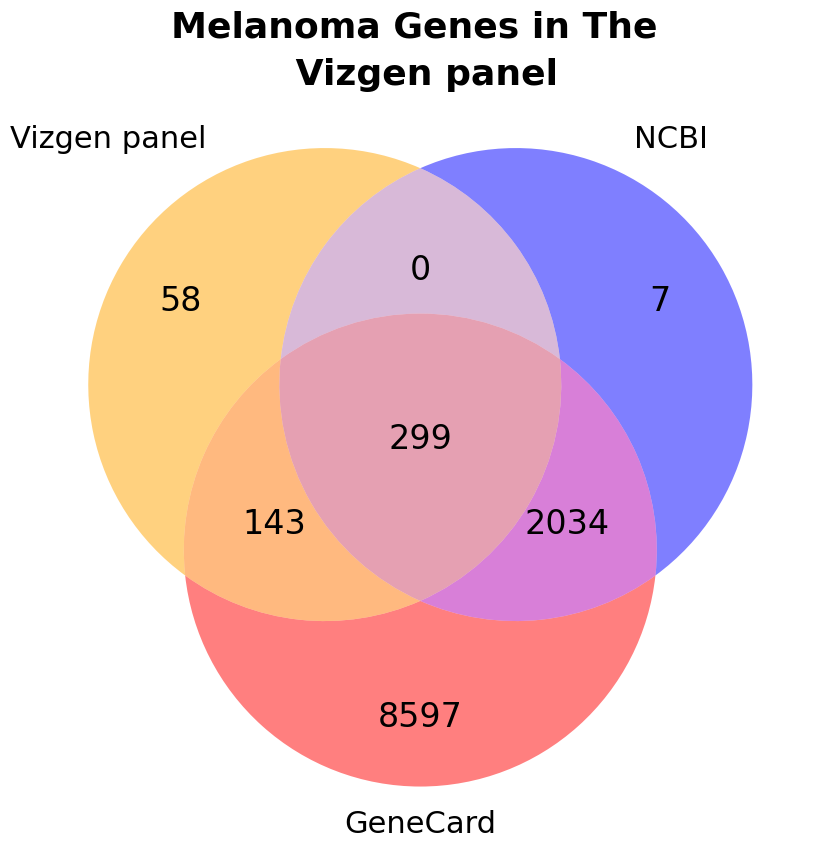

In [60]:
from matplotlib_venn import venn3_unweighted # venn3_unweighted วงกลมที่ได้ไม่ได้มีขนาดตามค่าจรืง

plt.figure(figsize=(10,10))
plt.title("Melanoma Genes in The \n Vizgen panel",
          fontsize=26,
          fontweight='bold'
          ,linespacing=1.5)

set1 = set(panel1)
set2 = set(ncbi1)
set3 = set(GeneCard1)

v = venn3_unweighted(subsets=([set1, set2, set3]),
	set_labels=('Vizgen panel', 'NCBI', 'GeneCard'),alpha=0.5,
	set_colors=("orange", "blue", "red"))

# เปลี่ยนขนาดตัวเลขภายในวงกลม
for text in v.subset_labels:
    if text is not None:  # Add a condition to check for None
        text.set_fontsize(24) # กำหนดขนาดตัวเลข

# เปลี่ยนขนาดตัวอักษรของ set_labels
for text in v.set_labels:
    if text is not None:  # Add a condition to check for None
        text.set_fontsize(22)  # กำหนดขนาดตัวอักษร



plt.show()

## HCC

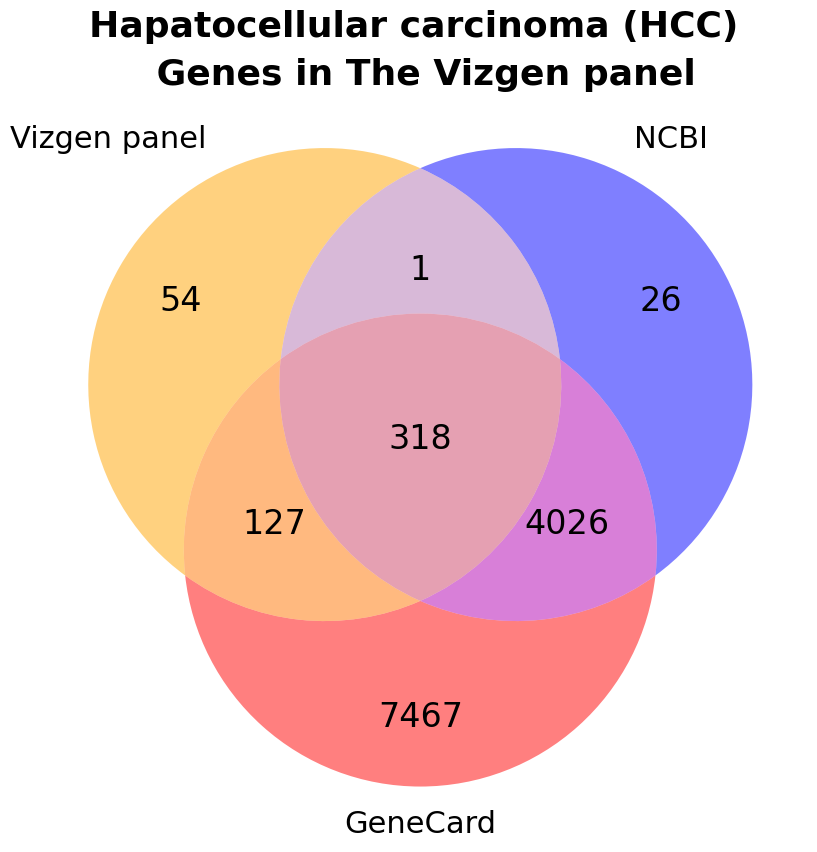

In [58]:
from matplotlib_venn import venn3_unweighted

plt.figure(figsize=(10,10))
plt.title("Hapatocellular carcinoma (HCC) \n Genes in The Vizgen panel",
          fontsize=26,
          fontweight='bold'
          ,linespacing=1.5)

set1 = set(panel1)
set2 = set(HCC1)
set3 = set(GeneCard_HCC1)

v = venn3_unweighted(subsets=([set1, set2, set3]),
	set_labels=('Vizgen panel', 'NCBI', 'GeneCard'),alpha=0.5,
	set_colors=("orange", "blue", "red"))

# เปลี่ยนขนาดตัวเลขภายในวงกลม
for text in v.subset_labels:
    if text is not None:  # Add a condition to check for None
        text.set_fontsize(24) # กำหนดขนาดตัวเลข

# เปลี่ยนขนาดตัวอักษรของ set_labels
for text in v.set_labels:
    if text is not None:  # Add a condition to check for None
        text.set_fontsize(22)  # กำหนดขนาดตัวอักษร

plt.show()

## HCC + Melanoma + Vizgen

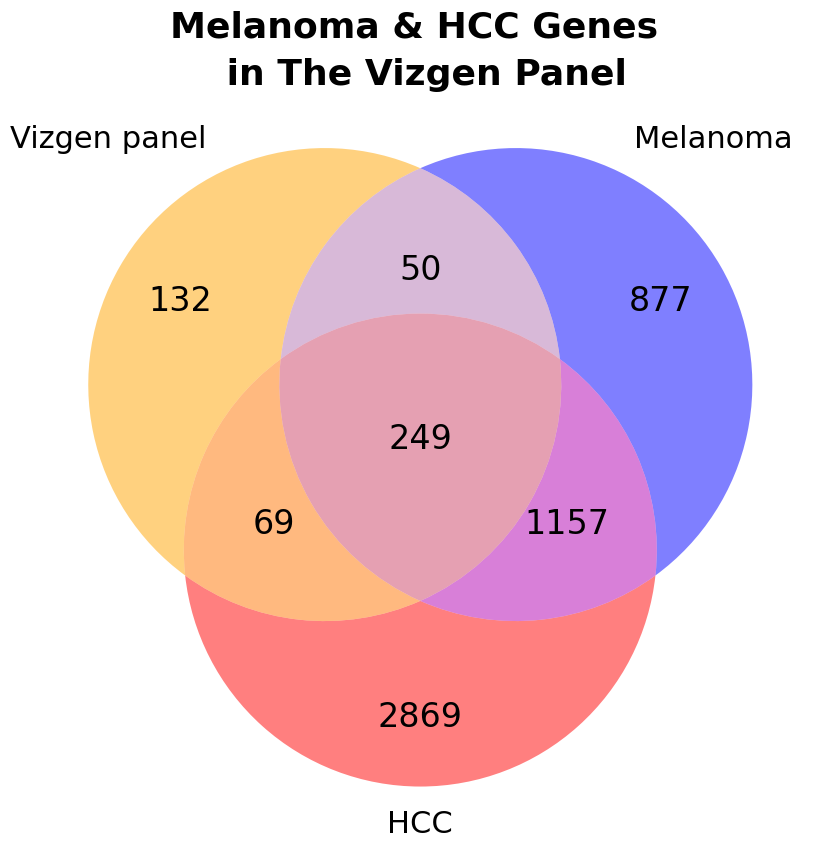

In [57]:
from matplotlib_venn import venn3_unweighted

plt.figure(figsize=(10,10))
plt.title("Melanoma & HCC Genes \n in The Vizgen Panel",
          fontsize=26,
          fontweight='bold'
          ,linespacing=1.5)

set1 = set(panel1)
set2 = set(NCBI_GeneCard1)
set3 = set(NCBI_GeneCard_HCC1)

v = venn3_unweighted(subsets=([set1, set2, set3]),
	set_labels=('Vizgen panel', 'Melanoma', 'HCC'),alpha=0.5,
	set_colors=("orange", "blue", "red"))

# เปลี่ยนขนาดตัวเลขภายในวงกลม
for text in v.subset_labels:
    if text is not None:  # Add a condition to check for None
        text.set_fontsize(24) # กำหนดขนาดตัวเลข

# เปลี่ยนขนาดตัวอักษรของ set_labels
for text in v.set_labels:
    if text is not None:  # Add a condition to check for None
        text.set_fontsize(22)  # กำหนดขนาดตัวอักษร

plt.show()

## Melanoma : Vizgen & Xenium

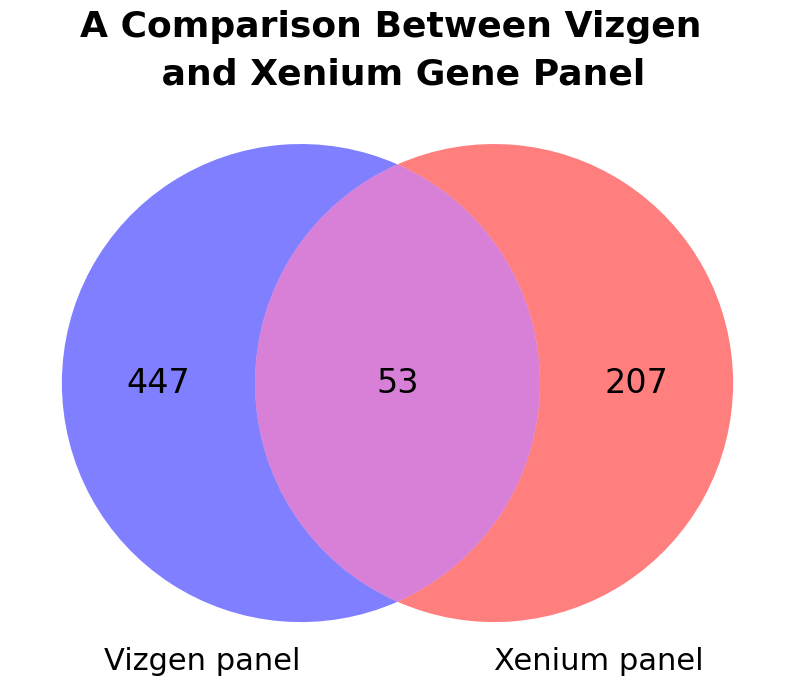

In [56]:
from matplotlib_venn import venn2_unweighted

plt.figure(figsize=(10,10))
plt.title("A Comparison Between Vizgen \n and Xenium Gene Panel",
          fontsize=26,
          fontweight='bold'
          ,linespacing=1.5)

melanoma_vizgen1 = melanoma_vizgen['Symbol']

set1 = set(panel1)
set2 = set(xenium1)

v = venn2_unweighted(subsets=([set1, set2]),
	set_labels=('Vizgen panel', 'Xenium panel'),alpha=0.5,
	set_colors=("blue", "red"))

# เปลี่ยนขนาดตัวเลขภายในวงกลม
for text in v.subset_labels:
    if text is not None:  # Add a condition to check for None
        text.set_fontsize(24) # กำหนดขนาดตัวเลข

# เปลี่ยนขนาดตัวอักษรของ set_labels
for text in v.set_labels:
    if text is not None:  # Add a condition to check for None
        text.set_fontsize(22)  # กำหนดขนาดตัวอักษร

plt.show()